In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/movies.csv", encoding='ISO-8859-1')

# Show the shape and first few rows
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of movie ratings
sns.histplot(df['rating'], kde=True)
plt.title("Distribution of Ratings")
plt.show()

# Visualizing genres if available
if 'genre' in df.columns:
    df['genre'].value_counts().plot(kind='bar', title='Genre Distribution')
    plt.show()


KeyError: 'rating'

In [4]:
# Check the columns in the dataset
df.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

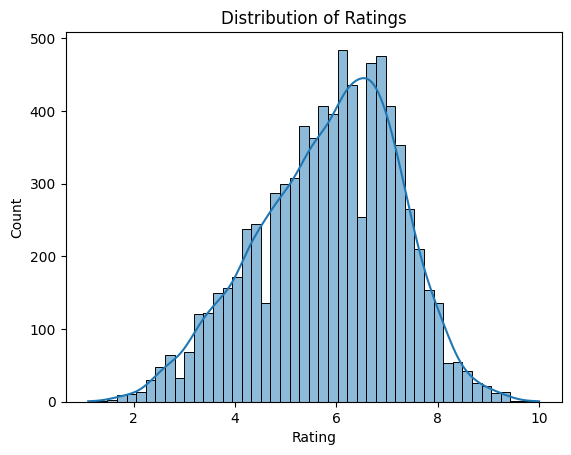

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of movie ratings
sns.histplot(df['Rating'], kde=True)
plt.title("Distribution of Ratings")
plt.show()


In [6]:
df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
df.describe()


,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
df = df.dropna(subset=['Rating']) 

In [9]:
df = pd.get_dummies(df, columns=['Genre', 'Director'], drop_first=True)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Duration', 'Votes']] = scaler.fit_transform(df[['Duration', 'Votes']])


ValueError: could not convert string to float: '109 min'

In [11]:
# Remove ' min' and convert to integer
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)


ValueError: cannot convert float NaN to integer

In [12]:
# Check for missing values in the 'Duration' column
print(df['Duration'].isnull().sum())


2068


In [14]:
# Fill missing values in 'Duration' column with the median value
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Now remove ' min' and convert to integer
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)



TypeError: Cannot convert ['109 min' '110 min' '147 min' ... nan '129 min' '130 min'] to numeric

In [15]:
# Fill missing values in 'Duration' column with the median value
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Now remove ' min' and convert to integer
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)


TypeError: Cannot convert ['109 min' '110 min' '147 min' ... nan '129 min' '130 min'] to numeric

In [16]:
# Step 1: Remove ' min' and convert to numeric (integer)
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float)

# Step 2: Fill missing values in 'Duration' with the median
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Now, you can proceed with feature scaling
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the 'Duration' and 'Votes' columns
df[['Duration', 'Votes']] = scaler.fit_transform(df[['Duration', 'Votes']])

# Check the transformed data
print(df[['Duration', 'Votes']].head())


ValueError: could not convert string to float: '1,086'

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Clean 'Duration' column
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# 2. Clean 'Votes' column: remove commas and convert to numeric
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(df['Votes'].median())

# 3. Feature Scaling
scaler = StandardScaler()
df[['Duration', 'Votes']] = scaler.fit_transform(df[['Duration', 'Votes']])

# 4. Display the result
print(df[['Duration', 'Votes']].head())


AttributeError: Can only use .str accessor with string values!

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ensure 'Duration' is string so we can use .str.replace
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'] = df['Duration'].fillna(df['Duration'].median())

# Clean 'Votes' column
df['Votes'] = df['Votes'].astype(str)
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(df['Votes'].median())

# Apply StandardScaler
scaler = StandardScaler()
df[['Duration', 'Votes']] = scaler.fit_transform(df[['Duration', 'Votes']])

# Check result
print(df[['Duration', 'Votes']].head())


   Duration     Votes
1 -1.039542 -0.166400
3 -0.995753 -0.164073
5  0.624435 -0.095807
6  0.405491 -0.073482
8 -2.221841 -0.138990


In [19]:
X = df[['Duration', 'Votes']]  # Add more features if needed
y = df['Rating']  # Make sure this column exists and is numeric


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Define your features and target
X = df[['Duration', 'Votes']]
y = df['Rating']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Store results
results = {}

# Train & evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}

# Show results
result_df = pd.DataFrame(results).T
print(result_df.sort_values(by='R²', ascending=False))


                        MAE       MSE        R²
Gradient Boosting  1.055277  1.740439  0.063850
Linear Regression  1.093265  1.820226  0.020934
Random Forest      1.135946  2.072245 -0.114622


In [22]:
pip install xgboost



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 330.3 kB/s eta 0:07:34
   ---------------------------------------- 0.0/150.0 MB 281.8 kB/s eta 0:08:52
   ---------------------------------------- 0.0/150.0 MB 281.8 kB/s eta 0:08:52
   ---------------------------------------- 0.1/150.0 MB 595.3 kB/s eta 0:04:12
   ---------------------------------------- 0.1/150.0 MB 532.5 kB/s eta 0:04:42
   ---------------------------------------- 0.2/150.0 MB 583.1 kB/s eta 0:04:17
   ---------------------------------------- 0.2/150.0 MB 562.0 kB/s eta 0:04:27
   ---------------------------------------- 0.2/150.0 MB 562.0 kB/s eta 0:04:27
   ---------------------------------------- 0.2/150.0 MB 562.0 kB/s eta 0:04:27
   ---------------------------------------- 0.3/150.0 MB 634.7 kB/


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ------ --------------------------------- 23.2/150.0 MB 1.0 MB/s eta 0:02:03
   ------ --------------------------------- 23.4/150.0 MB 1.1 MB/s eta 0:02:01
   ------ --------------------------------- 23.4/150.0 MB 1.1 MB/s eta 0:02:01
   ------ --------------------------------- 23.4/150.0 MB 1.0 MB/s eta 0:02:02
   ------ --------------------------------- 23.5/150.0 MB 1.1 MB/s eta 0:02:00
   ------ --------------------------------- 23.6/150.0 MB 1.1 MB/s eta 0:02:00
   ------ --------------------------------- 23.6/150.0 MB 1.1 MB/s eta 0:02:00
   ------ --------------------------------- 23.6/150.0 MB 1.1 MB/s eta 0:02:00
   ------ --------------------------------- 23.7/150.0 MB 1.1 MB/s eta 0:02:00
   ------ --------------------------------- 23.7/150.0 MB 1.1 MB/s eta 0:02:00
   ------ --------------------------------- 23.7/150.0 MB 1.1 MB/s eta 0:02:00
   ------ --------------------------------- 23.7/150.0 MB 1.1 MB/s eta 0:02:00
   ------ --------------------------------- 23.8/150

In [23]:
from xgboost import XGBRegressor


In [24]:
models = {}

# Example: other models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

models['Linear Regression'] = LinearRegression()
models['Random Forest'] = RandomForestRegressor(n_estimators=100, random_state=42)

# Add XGBoost
models['XGBoost'] = XGBRegressor(n_estimators=100, random_state=42)


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Model: {name}")
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("MSE:", mean_squared_error(y_test, predictions))
    print("R2 Score:", r2_score(y_test, predictions))
    print("-" * 30)


Model: Linear Regression
MAE: 1.093264677661438
MSE: 1.8202263091852957
R2 Score: 0.02093372411138905
------------------------------
Model: Random Forest
MAE: 1.1359457069649819
MSE: 2.0722449211006153
R2 Score: -0.11462245512710756
------------------------------
Model: XGBoost
MAE: 1.0974220842424065
MSE: 1.931652621009582
R2 Score: -0.0390004409994511
------------------------------


In [26]:
models['XGBoost'] = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

# Fit models
for name, model in models.items():
    model.fit(X_train, y_train)



In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R2 Score': r2})

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2 Score', ascending=False))


               Model       MAE       MSE  R2 Score
0  Linear Regression  1.093265  1.820226  0.020934
2            XGBoost  1.097422  1.931653 -0.039000
1      Random Forest  1.135946  2.072245 -0.114622


In [30]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import joblib

# Save the best model
joblib.dump(models['XGBoost'], 'best_model.pkl')


['best_model.pkl']

In [32]:
model = joblib.load('best_model.pkl')


In [ ]:
pip install streamlit
